### Task 4 – Loan Approval Prediction
**Objective:** Predict whether a loan application will be approved based on applicant details.

**Steps:**
- Loaded the loan dataset from an open-source repository.
- Cleaned missing values and encoded categorical data.
- Split the dataset into training and test sets (80/20).
- Trained a Random Forest Classifier using Scikit-learn.
- Evaluated performance using accuracy and confusion matrix.

**Results:**
- Model Accuracy: 79%
- Precision (Approved): 0.79
- Recall (Approved): 0.92
- F1-Score (Approved): 0.85
- The confusion matrix shows most approved loans were correctly classified.

**Conclusion:**
The Random Forest model effectively predicts loan approvals using applicant data such as credit history, income, and loan amount.  
It performs best at identifying approved loans, making it useful for automating preliminary credit decisions in finance.


Dataset Loaded Successfully!
   Unnamed: 0   Loan_ID  Gender Married Dependents     Education  \
0           0  LP002305  Female      No          0      Graduate   
1           1  LP001715    Male     Yes         3+  Not Graduate   
2           2  LP002086  Female     Yes          0      Graduate   
3           3  LP001136    Male     Yes          0  Not Graduate   
4           4  LP002529    Male     Yes          2      Graduate   

  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0            No             4547                0.0       115.0   
1           Yes             5703                0.0       130.0   
2            No             4333             2451.0       110.0   
3           Yes             4695                0.0        96.0   
4            No             6700             1750.0       230.0   

   Loan_Amount_Term  Credit_History Property_Area  Loan_Status  
0             360.0             1.0     Semiurban            1  
1             360.0          

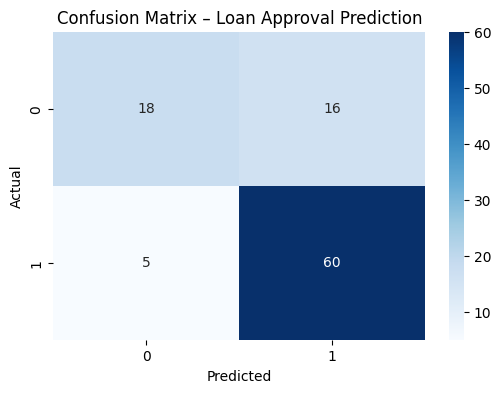

In [2]:
# =============================
# TASK 4: Loan Approval Prediction
# =============================
# Author: Jenna Halliwell
# Internship: Elevvo – Machine Learning Track
# Date: October 2025

# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Step 1: Load dataset ---
url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv"
data = pd.read_csv(url)
print("Dataset Loaded Successfully!")
print(data.head())

# --- Step 2: Handle missing values ---
data.fillna({
    'Gender': data['Gender'].mode()[0],
    'Married': data['Married'].mode()[0],
    'Dependents': data['Dependents'].mode()[0],
    'Self_Employed': data['Self_Employed'].mode()[0],
    'LoanAmount': data['LoanAmount'].median(),
    'Loan_Amount_Term': data['Loan_Amount_Term'].mode()[0],
    'Credit_History': data['Credit_History'].mode()[0]
}, inplace=True)

# --- Fix 'Dependents' column ---
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)

# --- Step 3: Encode categorical variables ---
le = LabelEncoder()
for col in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']:
    data[col] = le.fit_transform(data[col])

# --- Step 4: Prepare features and target ---
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

# --- Step 5: Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 6: Train model ---
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# --- Step 7: Evaluate model ---
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Step 8: Visualize confusion matrix ---
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Loan Approval Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
